In [123]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [124]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr:float
    bpb:float
    boundary_percentage:float
    summary:str

In [125]:
graph=StateGraph(BatsmanState)

In [126]:
def calculate_sr(state:BatsmanState)->dict:
    r=state["runs"]
    b=state["balls"]
    sr= r/b*100.0

    return {"sr":sr}

def bpd_(state:BatsmanState)->dict:
    total=state["sixes"]+state["fours"]
    bpd=state["balls"]/total

    return {"bpb":bpd}

def boundary_p(state:BatsmanState)->dict:
    total_runs=state["runs"]
    total_runs_b=(4*state["fours"]+6*state["sixes"])
    boundary_percentage=(total_runs_b/total_runs)* 100

    return {"boundary_percentage":boundary_percentage}

In [127]:
def summary(state:BatsmanState)->dict:
    summary=f"""
    Strike Rate: {state["sr"]}
    Balls per boundary: {state["bpb"]}
    Boundary Percentage: {state["boundary_percentage"]}
    """

    return {"summary":summary}

In [128]:
graph.add_node("calculate_sr",calculate_sr)
graph.add_node("boundary_p",boundary_p)
graph.add_node("bpd_",bpd_)
graph.add_node("summary",summary)

In [129]:
graph.add_edge(START,"calculate_sr")
graph.add_edge(START,"boundary_p")
graph.add_edge(START,"bpd_")
graph.add_edge("calculate_sr","summary")
graph.add_edge("boundary_p","summary")
graph.add_edge("bpd_","summary")
graph.add_edge("summary",END)

In [130]:
workflow=graph.compile()

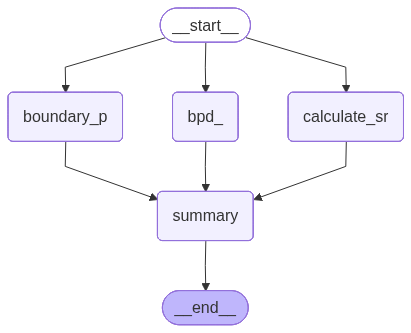

In [131]:
workflow

In [132]:
workflow.invoke({"runs":147,"balls":85,"fours":5,"sixes":10})

{'runs': 147,
 'balls': 85,
 'fours': 5,
 'sixes': 10,
 'sr': 172.94117647058823,
 'bpb': 5.666666666666667,
 'boundary_percentage': 54.421768707483,
 'summary': '\n    Strike Rate: 172.94117647058823\n    Balls per boundary: 5.666666666666667\n    Boundary Percentage: 54.421768707483\n    '}